<h1 align='center'> Ground Motion Response Spectra </h1>

**Purpose:** To double-check the functions coded to obtain the response spectra from earthquake ground motions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import llgeo.motions.spectra as llgeo_spectra

## El Centro
- Used as a test to make sure that the response spectra functions are working properly
- Stolen from: http://vibrationdata.com/elcentro.htm
- Read data, plot, and compare

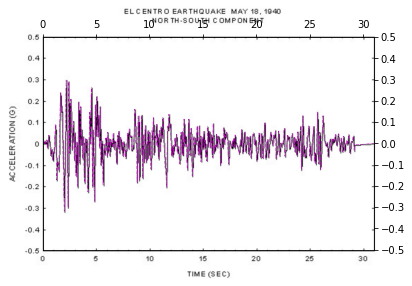

In [2]:
# Read data
data = np.genfromtxt('elcentro.dat')

# Read figure
img = mpimg.imread('elcentro.png')

# Plot data and figure
fig, img_ax = plt.subplots(figsize = (7, 5))
data_ax = fig.add_axes([0.216, 0.206, 0.657, 0.59], anchor = 'C', facecolor = 'None')
img_ax.imshow(img)
data_ax.plot(data[:, 0], data[:, 1], linestyle = '-.', linewidth = 0.5, color = 'm')

# Customize
img_ax.axis('off')
data_ax.set_xlim([0, 31])
data_ax.set_ylim([-0.5, 0.5])
data_ax.set_yticks(np.arange(-0.5, 0.5+0.1, 0.1))
data_ax.set_axisbelow(True)
data_ax.xaxis.set_ticks_position('top')
data_ax.yaxis.set_ticks_position('right')

## Basic Parameters

In [3]:
dt  = np.round(data[1, 0] - data[0, 0], 5)
acc = data[:, 1]
Ts  = np.logspace(-1, 1, 100)

## Response Specra

In [4]:
# Method No. 1: Wang 1996
SD, PSV, PSA, SA, SV, ED = llgeo_spectra.resp_spectra_wang(acc, dt, Ts)

# Method No. 2: Arduino's Notebook
umax, vmax, amax = llgeo_spectra.resp_spectra_arduino(acc, dt, len(acc), Ts)

In [15]:
p, umax, vmax, amax2 = resp_spectra(acc, dt, len(acc))

(0.01, 1)

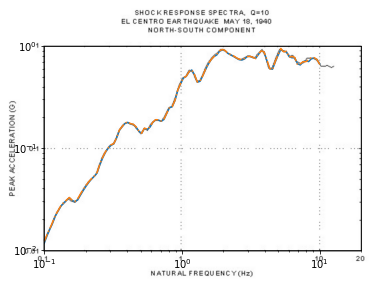

In [40]:
# Read figure
img = mpimg.imread('elcentro_spectra.png')

# Plot data and figure
fig, img_ax = plt.subplots(figsize = (7, 5))
data_ax = fig.add_axes([0.225, 0.206, 0.629, 0.565], anchor = 'C', facecolor = 'None')
img_ax.imshow(img)

# Customize
img_ax.axis('off')
data_ax.plot(1/Ts, PSA)
data_ax.plot(1/Ts, SA, '-.')
# data_ax.plot(1/Ts, amax, '-k') # This one doesn't work

data_ax.set_xscale('log')
data_ax.set_yscale('log')
data_ax.set_xlim([.1, 20])
data_ax.set_ylim([.01, 1])

(0.0, 1.5)

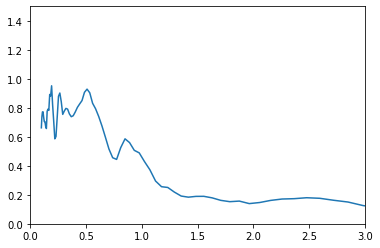

In [47]:
# Plot against natural period instead of frequnecy
fig, ax = plt.subplots()
ax.plot(Ts, SA)
ax.set_xlim([0, 3])
ax.set_ylim([0, 1.5])